# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Jalelle | Dinka | Jalelle Dinka 17- Oct-24 | 6 | 25% |
| Member 2: | Mahweer | Kumar | Mahweer Kumar 17- Oct-24 | 6 | 25% |
| Member 3: | Leanne | Lane | Leanne Lane 17- Oct-24 | 6 | 25% |
| Member 4: | Navneet | Robin | Navneet Robin 17- Oct-24 | 6 | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

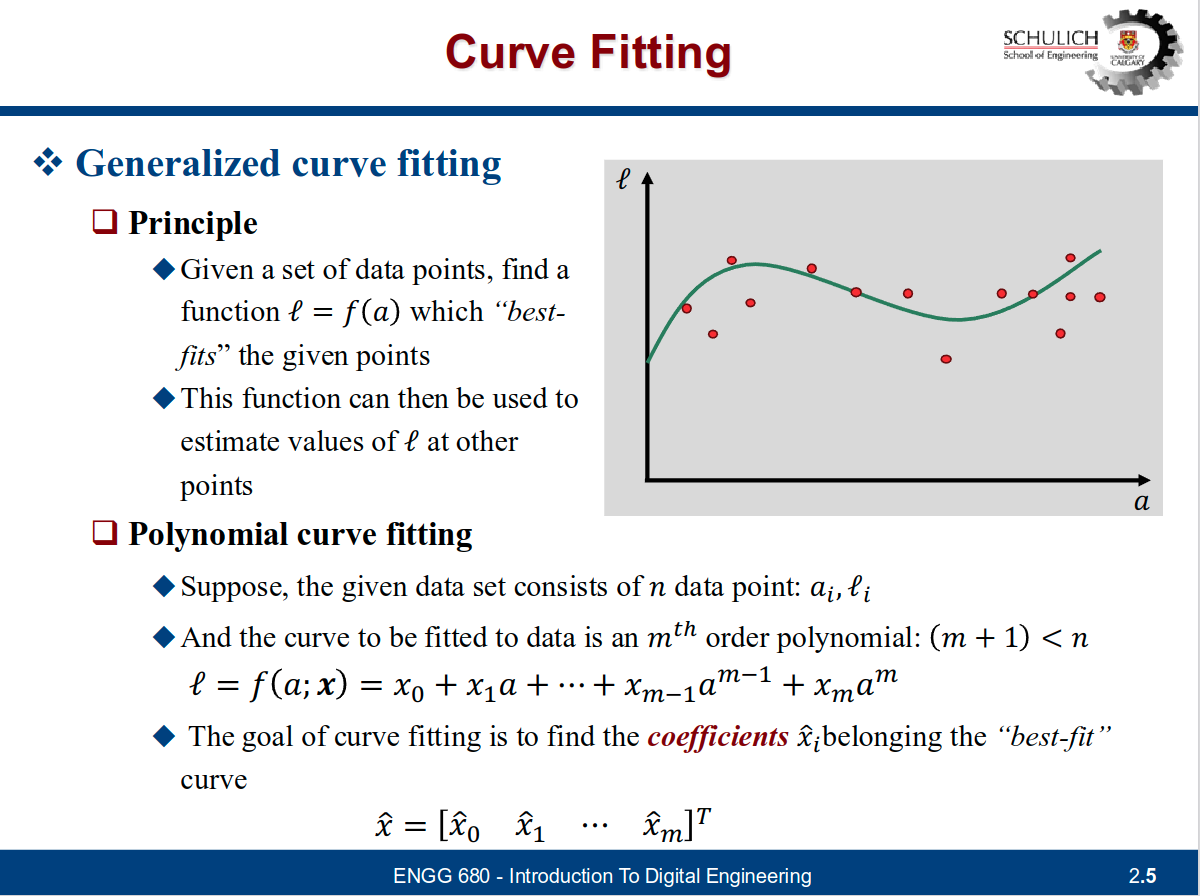

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [5]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = "/content/data.xlsx"
df = pd.read_excel(df_data)
print(df.head())
arr_data = df.to_numpy()
print(arr_data)

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = df['l'].to_numpy()
l_var = df['l_var'].to_numpy()
l_true = df['l_true'].to_numpy()

FileNotFoundError: [Errno 2] No such file or directory: '/content/data.xlsx'

In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)
print(n)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)
print(P)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)
a = np.linspace(-1, 1, len(l))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.plot(a, l_true, label="f(a)", color='k')
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)
ax.set_xlim(-1, 1)
ax.set_xlabel('a')
ax.set_ylabel('observations (l)')
ax.set_title('True and Noisy Observations')
ax.legend()
ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()
plt.show()

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    X = np.vander(a, deg + 1, increasing=True)
    Xt = np.transpose(X)
    XtP = Xt @ P
    XtPX = XtP @ X
    XtPY = XtP @ l
    x = np.linalg.inv(XtPX) @ XtPY
    fitted_values = X @ x
    v = l - fitted_values
    n = len(l)
    m = len(x)
    apv = (v.T @ P @ v) / (n - m)
    covariance_matrix = apv * np.linalg.inv(XtPX)
    cov_x = np.sqrt(np.diag(covariance_matrix))
    return (x, cov_x, apv, v)




In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
degrees = [1, 3, 5]
for degree in degrees:
    print(f"\nPolynomial Degree: {degree}")
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, degree)
    print("x:", x)
    print("cov_x:", cov_x)
    print("apv:", apv)
    print("v:", v[:5], "...")

In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)
coefficients_degree_1 = np.array([-16.59352348,  7.25633807])
coefficients_degree_3 = np.array([-16.72496774,  19.63961372, 0.03979476, -2.08281013])
coefficients_degree_5 = np.array([-1.65770980e+01,  2.28207004e+01, -1.09433276e-01, -3.58096979e+00, 1.75697706e-02,  1.36073672e-01])
line_uw = np.polyval(coefficients_degree_1, a)
cubic_uw = np.polyval(coefficients_degree_3, a)
quintic_uw = np.polyval(coefficients_degree_5, a)

print("Linear Polynomial Values:", line_uw[:5], "...")
print("Cubic Polynomial Values:", cubic_uw[:5], "...")
print("Quintic Polynomial Values:", quintic_uw[:5], "...")

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.plot(a, l_true, label="f(a)", color='k')
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)
plt.plot(a, line_uw, label='Linear Polynomial', color='orange', linewidth=2)
plt.plot(a, cubic_uw, label='Cubic Polynomial', color='green', linewidth=2)
plt.plot(a, quintic_uw, label='Quintic Polynomial', color='red', linewidth=2)
ax.set_xlim(-1, 1)
ax.set_xlabel('a')
ax.set_ylabel('observations (l)')
plt.title('Polynomial Curve Fitting')
plt.legend()
ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()
plt.show()

In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
x_deg_1, cov_x_deg_1, apv_deg_1, v_deg_1 = fit_polynomial_curve(a, l, P, deg=1)
print(f"Polynomial Degree: 1, APV: {apv_deg_1}")
x_deg_3, cov_x_deg_3, apv_deg_3, v_deg_3 = fit_polynomial_curve(a, l, P, deg=3)
print(f"Polynomial Degree: 3, APV: {apv_deg_3}")
x_deg_5, cov_x_deg_5, apv_deg_5, v_deg_5 = fit_polynomial_curve(a, l, P, deg=5)
print(f"Polynomial Degree: 5, APV: {apv_deg_5}")

In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
predicted_deg_1 = np.polyval(x_deg_1, a)
norm_deg_1 = np.linalg.norm(predicted_deg_1 - l_true)
print(f"Norm between predicted (Degree 1) and true observations: {norm_deg_1}")
predicted_deg_3 = np.polyval(x_deg_3, a)
norm_deg_3 = np.linalg.norm(predicted_deg_3 - l_true)
print(f"Norm between predicted (Degree 3) and true observations: {norm_deg_3}")
predicted_deg_5 = np.polyval(x_deg_5, a)
norm_deg_5 = np.linalg.norm(predicted_deg_5 - l_true)
print(f"Norm between predicted (Degree 5) and true observations: {norm_deg_5}")

In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
print(f"Degree 3 (cubic) polynomial seems to strike the best balance between complexity and fit. It has a lower APV and norm compared to the linear model, indicating a better fit. However, moving from a cubic to a quintic polynomial shows diminishing returns, as the APV only improves slightly, and the norm actually increases, suggesting that overfitting may be occurring.")


In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1 / l_var)
print(P)

In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
degrees = [1, 3, 5]
for degree in degrees:
    print(f"\nPolynomial Degree: {degree}")
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, degree)
    print("x:", x)
    print("cov_x:", cov_x)
    print("apv:", apv)
    print("v:", v[:5], "...")


In [ ]:
# Repeating step 7
coefficients_degree_1 = np.array([-16.54496159,  24.12286423])
coefficients_degree_3 = np.array([-16.77797524,  63.87351622,  -0.33854384, -69.25466077])
coefficients_degree_5 = np.array([-16.79510255,   71.25189173, -0.69802384, -108.45865879,  0.79132852,  37.50203372])
line_uw = np.polyval(coefficients_degree_1, a)
cubic_uw = np.polyval(coefficients_degree_3, a)
quintic_uw = np.polyval(coefficients_degree_5, a)
print("Linear Polynomial Values:", line_uw[:5], "...")
print("Cubic Polynomial Values:", cubic_uw[:5], "...")
print("Quintic Polynomial Values:", quintic_uw[:5], "...")

In [ ]:
# Repeating step 8
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.plot(a, l_true, label="f(a)", color='k')
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)
plt.plot(a, line_uw, label='Linear Polynomial', color='orange', linewidth=2)
plt.plot(a, cubic_uw, label='Cubic Polynomial', color='green', linewidth=2)
plt.plot(a, quintic_uw, label='Quintic Polynomial', color='red', linewidth=2)
ax.set_xlim(-1, 1)
ax.set_xlabel('a')
ax.set_ylabel('observations (l)')
plt.title('Polynomial Curve Fitting')
plt.legend()
ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()
plt.show()

In [ ]:
#Repeating step 9
x_deg_1, cov_x_deg_1, apv_deg_1, v_deg_1 = fit_polynomial_curve(a, l, P, deg=1)
print(f"Polynomial Degree: 1, APV: {apv_deg_1}")
x_deg_3, cov_x_deg_3, apv_deg_3, v_deg_3 = fit_polynomial_curve(a, l, P, deg=3)
print(f"Polynomial Degree: 3, APV: {apv_deg_3}")
x_deg_5, cov_x_deg_5, apv_deg_5, v_deg_5 = fit_polynomial_curve(a, l, P, deg=5)
print(f"Polynomial Degree: 5, APV: {apv_deg_5}")

In [ ]:
# Repeating step 10
predicted_deg_1 = np.polyval(x_deg_1, a)
norm_deg_1 = np.linalg.norm(predicted_deg_1 - l_true)
print(f"Norm between predicted (Degree 1) and true observations: {norm_deg_1}")
predicted_deg_3 = np.polyval(x_deg_3, a)
norm_deg_3 = np.linalg.norm(predicted_deg_3 - l_true)
print(f"Norm between predicted (Degree 3) and true observations: {norm_deg_3}")
predicted_deg_5 = np.polyval(x_deg_5, a)
norm_deg_5 = np.linalg.norm(predicted_deg_5 - l_true)
print(f"Norm between predicted (Degree 5) and true observations: {norm_deg_5}")

In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
print(f"The APV values for the weighted LSE are significantly lower than those for the unweighted LSE across all polynomial degrees. This indicates that the weighted LSE provides a better fit to the data when considering the variance of the observations, particularly enhancing model performance for higher degrees.")
print(f"The norm values for the first-degree polynomial are higher in the weighted case, suggesting that while weighting improves fitting in complex models, it can also introduce additional error when applied to simpler models, potentially indicating overfitting or misalignment with the underlying data structure.")

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

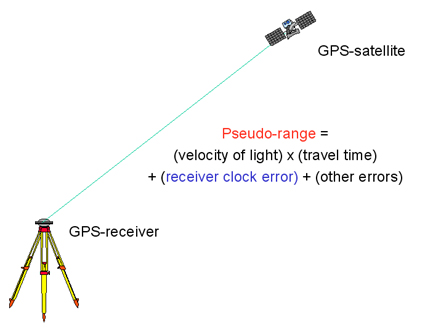

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [12]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel("/pseudoranges.xlsx")
df_sat_pos = pd.read_excel("/satellite_position.xlsx")

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()
print (df_pseudorange)
print (df_sat_pos)

    Satellite_ID             P
0              7  2.291974e+07
1              8  2.045989e+07
2             11  2.240034e+07
3             15  2.282914e+07
4             17  2.234201e+07
5             18  2.564645e+07
6             19  2.381478e+07
7             24  2.431140e+07
8             26  2.135364e+07
9             27  2.497161e+07
10            28  2.063898e+07
    Satellite_ID             x             y             z
0              7  5.280792e+06 -2.550146e+07  4.649508e+06
1              8 -2.159656e+06 -2.111602e+07  1.559791e+07
2             11  1.037185e+07 -2.171311e+07  1.055869e+07
3             15 -1.608576e+07  4.285071e+06  2.074204e+07
4             17 -1.431299e+07 -2.204501e+07  4.671208e+06
5             18 -2.435718e+06  1.625721e+07  2.109978e+07
6             19  1.591247e+07 -3.462515e+06  2.105363e+07
7             24  1.627185e+07 -2.187663e+05  2.103533e+07
8             26 -1.924704e+07 -7.259804e+06  1.647298e+07
9             27 -1.593115e+07  1.2077

In [13]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = len(pseudorange)
xr = 0
yr = 0
zr = 0
cdT = 0
states = [xr, yr, zr, cdT]
m = len(states)
print("The number of measurements (n) are:", n)
print("The number of states (m) are:", m)

The number of measurements (n) are: 11
The number of states (m) are: 4


In [14]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.eye(n)
print ("The weight matrix (P) is:\n", P)

The weight matrix (P) is:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [15]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)
print ("The initial states (x_0) are:\n", x_0)

The initial states (x_0) are:
 [0. 0. 0. 0.]


In [16]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [17]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)

delta = np.ones(4) #corrections array as ones

i = 0 #iteration loop counter I as zero

arr_x = []
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []

x_hat = x_0.copy()

receiver_pos = x_hat[:3]  # Extract receiver position
satellite_pos = df_sat_pos.iloc[:, 1:4].to_numpy()  # Extract satellite positions

# Check the updated x_hat
print("Initial x_hat:", x_hat)
print("Initial receiver position:", receiver_pos)
print("Initial satellite positions:\n", satellite_pos)

# Optional for additional analysis
arr_apv = []  # to store A Posteriori Variance of Unit Weight
arr_C_x_hat = []  # to store Covariance matrices

Initial x_hat: [0. 0. 0. 0.]
Initial receiver position: [0. 0. 0.]
Initial satellite positions:
 [[  5280791.73836563 -25501460.1192133    4649508.28809917]
 [ -2159656.05205653 -21116024.7920163   15597909.1971221 ]
 [ 10371852.1682927  -21713111.3497771   10558686.998121  ]
 [-16085760.7811889    4285071.21612309  20742042.1246963 ]
 [-14312988.0806279  -22045014.2659254    4671208.3988653 ]
 [ -2435718.18737303  16257205.12951     21099779.5379103 ]
 [ 15912467.1868696   -3462515.31492602  21053628.253335  ]
 [ 16271848.163885     -218766.32031082  21035332.7037679 ]
 [-19247035.5286677   -7259803.67892242  16472981.9071979 ]
 [-15931152.0364578   12077367.2515846   18058076.7648504 ]
 [ -7680014.10843999 -13855462.7231353   21842975.3728112 ]]


In [18]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)

def euclidean_norm(receiver_pos, satellite_pos):
    differences = satellite_pos - receiver_pos[:3]  # Exclude clock bias
    geometric_distance = np.linalg.norm(differences, axis=1)
    return geometric_distance

# Step to compute geometric distances
geometric_distances = euclidean_norm(x_hat, satellite_pos)  # Use your defined function

print("Geometric Distances:\n", geometric_distances)

# Check if the distances are unique
print("Unique Geometric Distances:\n", np.unique(geometric_distances))

print ("estimated states\n", x_hat)
print ("satellite psoitions:\n", satellite_pos)
print ("receiver positions:\n", receiver_pos)



Geometric Distances:
 [26454284.28283253 26340945.09697588 26277754.71787928 26595974.25813834
 26695776.25180958 26747525.83435867 26616740.72663527 26595227.45399327
 26353600.49429986 26939906.11311798 26982810.03000365]
Unique Geometric Distances:
 [26277754.71787928 26340945.09697588 26353600.49429986 26454284.28283253
 26595227.45399327 26595974.25813834 26616740.72663527 26695776.25180958
 26747525.83435867 26939906.11311798 26982810.03000365]
estimated states
 [0. 0. 0. 0.]
satellite psoitions:
 [[  5280791.73836563 -25501460.1192133    4649508.28809917]
 [ -2159656.05205653 -21116024.7920163   15597909.1971221 ]
 [ 10371852.1682927  -21713111.3497771   10558686.998121  ]
 [-16085760.7811889    4285071.21612309  20742042.1246963 ]
 [-14312988.0806279  -22045014.2659254    4671208.3988653 ]
 [ -2435718.18737303  16257205.12951     21099779.5379103 ]
 [ 15912467.1868696   -3462515.31492602  21053628.253335  ]
 [ 16271848.163885     -218766.32031082  21035332.7037679 ]
 [-19247035

In [19]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(estimated_states, satellite_pos, geometric_distances):

# Initialize the Jacobian matrix with zeros
  A = np.zeros((len(satellite_pos), len(estimated_states)))

#original A was poorly ranked and not well conditioned, so added the following:
  for j in range(len(satellite_pos)):

        # Calculate the distance to the satellite (excluding clock bias)
        d = geometric_distances[j]

        # Ensure no division by zero
        if d != 0:
            # Calculate partial derivatives w.r.t. x, y, z
            A[j, :3] = -1*(satellite_pos[j] - estimated_states[:3]) / d
        else:
            A[j, :3] = np.zeros(3)  # If distance is zero, set to zero

        # Partial derivative with respect to the clock bias
        A[j, 3] = -1  # This is always 1 since cdT is a constant offset in the pseudorange equation

        # Normalize the matrix (excluding the clock bias column)
        #for col in range(A.shape[1] - 1):
          #A[:, col] = A[:, col] / np.linalg.norm(A[:, col])

  return A

# Call the design_matrix function to calculate A before using it
A = design_matrix(x_hat, satellite_pos, geometric_distances)  # Calculate A here

#CONDITION NUMBER
#The condition number measures how sensitive a matrix is to small changes in input.
#A condition number close to 1 indicates that the matrix is well-conditioned
condition_number = np.linalg.cond(A)

#RANK
# The rank of a matrix is the number of independent rows or columns.
#If a matrix has a rank of 4, it means there are 4 linearly independent rows or columns
rank = np.linalg.matrix_rank(A)

# print to check

print("Rank of A:\n", rank)
print("Condition Number of A:\n", condition_number)
print ("  ", )
print ("estimated states:\n", x_hat)
print ("receiver positions:\n", receiver_pos)
print ("  ", )
print ("geometric distances:\n", geometric_distances)
print ("  ", )
print ("satellite positions:\n", satellite_pos)

print ("A:\n", A)

Rank of A:
 4
Condition Number of A:
 10.025441726121278
  
estimated states:
 [0. 0. 0. 0.]
receiver positions:
 [0. 0. 0.]
  
geometric distances:
 [26454284.28283253 26340945.09697588 26277754.71787928 26595974.25813834
 26695776.25180958 26747525.83435867 26616740.72663527 26595227.45399327
 26353600.49429986 26939906.11311798 26982810.03000365]
  
satellite positions:
 [[  5280791.73836563 -25501460.1192133    4649508.28809917]
 [ -2159656.05205653 -21116024.7920163   15597909.1971221 ]
 [ 10371852.1682927  -21713111.3497771   10558686.998121  ]
 [-16085760.7811889    4285071.21612309  20742042.1246963 ]
 [-14312988.0806279  -22045014.2659254    4671208.3988653 ]
 [ -2435718.18737303  16257205.12951     21099779.5379103 ]
 [ 15912467.1868696   -3462515.31492602  21053628.253335  ]
 [ 16271848.163885     -218766.32031082  21035332.7037679 ]
 [-19247035.5286677   -7259803.67892242  16472981.9071979 ]
 [-15931152.0364578   12077367.2515846   18058076.7648504 ]
 [ -7680014.10843999 -1

In [20]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)


max_iterations = 100
tolerance = 0.00001

# Initialize x_hat before the loop
#x_hat = np.array([-1.63344111e+06, -3.65170551e+06, 4.95260895e+06, 2.07976684e+01]) #Ground Truth
x_hat = x_0.copy()  # Initialize x_hat with x_0
#receiver_pos = x_hat[:3]  # Extract receiver position

# Initialize x_hat, ground_truth, pseudoranges and satellite_positions before the loop
ground_truth = GroundTruth  # Assign GroundTruth to ground_truth
pseudoranges = df_pseudorange['P'].to_numpy()  # Assign pseudoranges
satellite_positions = df_sat_pos.iloc[:, 1:4].to_numpy()  # Assign satellite positions

n = len(pseudoranges)
P = np.eye(n)  # Identity matrix for weight

# Initialize the iteration counter
delta = np.zeros_like(x_hat)  # Initialize delta with zeros

# Check the updated x_hat
print("Initial x_hat:", x_hat)
print("Initial receiver position:", receiver_pos)
print ()

#while (convergence criteria)
while i < max_iterations:

      # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
      # (1 marks)
      rho = euclidean_norm(x_hat, satellite_positions)  # geometric distance (p)

      # compute the design matrix A
      # (1 marks)
      A = design_matrix(x_hat, satellite_positions,rho)

      # compute the misclosure array w
      # (1 marks)
      w = pseudoranges - (rho-x_hat[3])

      # compute the corrections delta
      # (1 marks)
      try:
          delta = np.linalg.solve(A.T @ P @ A, A.T @ P @ w)
      except np.linalg.LinAlgError:
          delta = np.linalg.pinv(A.T @ P @ A) @ (A.T @ P @ w)

      # update the states
      # (1 marks)
      x_hat += delta

      # compute the position error from using the updated states against groundtruth
      # (1 marks)
      err_pos = np.linalg.norm(ground_truth - x_hat[:3])

      # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
      # (1 marks)
      arr_w.append(w)
      arr_delta.append(delta)
      arr_err_pos.append(err_pos)
      arr_i.append(i)
      arr_x.append(x_hat.copy())
      arr_apv.append(np.linalg.pinv(A.T @ A))
      arr_C_x_hat.append(np.linalg.pinv(A.T @ A))

      #print(f"Iteration {i}, delta: {delta}, err_pos: {err_pos}")

      # Check for convergence
      #if np.linalg.norm(delta[:3]) < tolerance:  # Check only the position part
        #break

      i += 1  # Increment the counter after each iteration

      # Check convergance after updating x_hat
      if np.linalg.norm(delta[:3]) < tolerance and abs(delta[3]) < tolerance:
        break  # Exit the loop if convergence is reached


# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = (w.T @ w) / (len(w) - len(x_hat))  # Adjust for degrees of freedom

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv * np.linalg.pinv(A.T @ A)

# Output results
print("Estimated Receiver Position (x, y, z, clock bias) x_hat:", x_hat)
print("Estimated Receiver Position (x, y, z, clock bias) receiver_pos:", receiver_pos)
print("\nPosition Error:", err_pos)
print("A Posteriori Variance of Unit Weight:", apv)
print("\nCovariance Matrix of Estimated States:\n", C_x_hat)
print("\nNumber of Iterations:", i)


Initial x_hat: [0. 0. 0. 0.]
Initial receiver position: [0. 0. 0.]

Estimated Receiver Position (x, y, z, clock bias) x_hat: [-1.63349244e+06 -3.65162954e+06  4.95248543e+06 -6.47201389e+00]
Estimated Receiver Position (x, y, z, clock bias) receiver_pos: [0. 0. 0.]

Position Error: 5.431614720187605
A Posteriori Variance of Unit Weight: 0.8852888550948891

Covariance Matrix of Estimated States:
 [[ 0.28298264  0.06167139 -0.07487066  0.06468701]
 [ 0.06167139  0.37666273 -0.51441611  0.32601524]
 [-0.07487066 -0.51441611  1.81094829 -0.9773772 ]
 [ 0.06468701  0.32601524 -0.9773772   0.61904475]]

Number of Iterations: 6


In [21]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)

print("Estimated States:", x_hat) # Or is this supposed to be X_hat?
print("\Corrections Array:", delta)
print("Estimated Measurements Residuals:", w)
print("A Posteriori Variance of Unit Weight:", apv)
print("Covariance Matrix of Estimated States:\n", C_x_hat)
print("Number of Iterations:", i)
print("3-D Position Errors:", err_pos)

Estimated States: [-1.63349244e+06 -3.65162954e+06  4.95248543e+06 -6.47201389e+00]
\Corrections Array: [ 1.15383569e-10  1.60639890e-09 -2.51296118e-09  3.90582323e-09]
Estimated Measurements Residuals: [ 0.25997571  0.11117279 -1.09950209 -0.00500055  0.20031684 -1.41815427
 -0.09126721  1.5120914   0.26365487  0.61138618 -0.34467368]
A Posteriori Variance of Unit Weight: 0.8852888550948891
Covariance Matrix of Estimated States:
 [[ 0.28298264  0.06167139 -0.07487066  0.06468701]
 [ 0.06167139  0.37666273 -0.51441611  0.32601524]
 [-0.07487066 -0.51441611  1.81094829 -0.9773772 ]
 [ 0.06468701  0.32601524 -0.9773772   0.61904475]]
Number of Iterations: 6
3-D Position Errors: 5.431614720187605


In [22]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

# #ANSWER....
#1. APV of 0.88 is close to 1 which indicates that the model is a, "good fit", that the residuals are close to the expected noise level and within an acceptable range.
#2. The covariance matrix suggests some correlation between the estimated states, but nothing excessive that would undermine the quality of the solution.

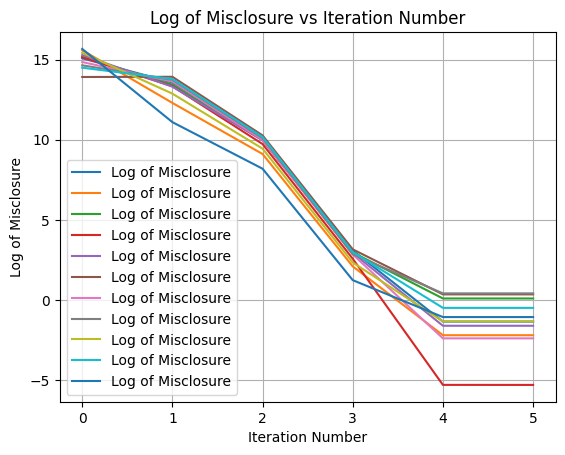

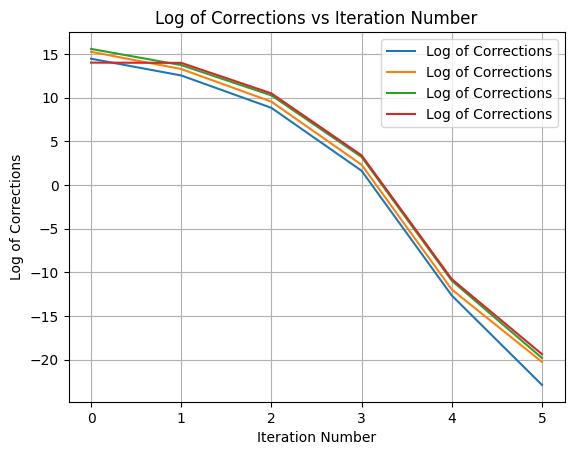

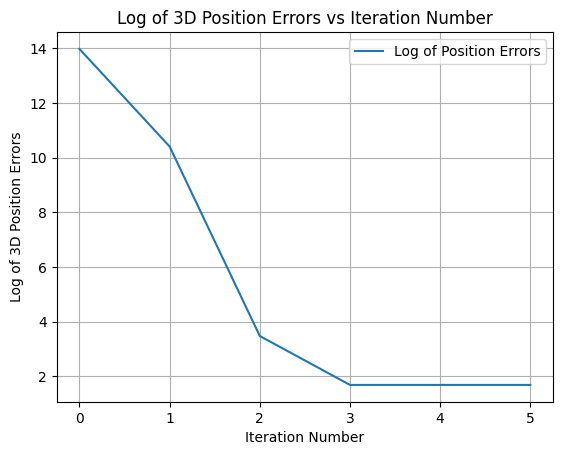

In [23]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, np.log(np.abs(arr_w)), label='Log of Misclosure')
plt.xlabel('Iteration Number')
plt.ylabel('Log of Misclosure')
plt.title('Log of Misclosure vs Iteration Number')
plt.grid()
plt.legend()
plt.show()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
#arr_delta_filtered = np.array(arr_delta)
#arr_delta_filtered = np.where(arr_delta_filtered == 0, 1e-10, arr_delta_filtered)  # Replace zeros

plt.figure()
plt.plot(arr_i, np.log(np.abs(arr_delta)), label='Log of Corrections')
plt.xlabel('Iteration Number')
plt.ylabel('Log of Corrections')
plt.title('Log of Corrections vs Iteration Number')
plt.grid()
plt.legend()
plt.show()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, np.log(np.abs(arr_err_pos)), label='Log of Position Errors')
plt.xlabel('Iteration Number')
plt.ylabel('Log of 3D Position Errors')
plt.title('Log of 3D Position Errors vs Iteration Number')
plt.grid()
plt.legend()
plt.show()
# (1 marks)

In [24]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

#ANSWER....
#1. Graph (1): log of the misclosure w against the LSQ iteration number i
    # Misclosure data decreases over each iteration
#2. Graph (2): log of the corrections delta against the LSQ iteration number i
    # Corrections delta decreases over each iteration
#3. Graph (3): log of the 3D position errors against the LSQ iteration number i
    # 3D position erros decrease over each iteration

In [25]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!

#ANSWER....
#1. Latitude: 51.25864deg N; Longitude: 245.89948deg E; Height: 1132.4m
#2. Where longtitude is adjusted, e.g., 245.89948degE - 360deg = 114.10052deg W
#3. Thus, final answer is: Latitude: 51.25864deg N; Longitude: 114.10052deg W; Height: 1132.4m
#4. Crossfield Elementary School
